## Tugas Besar Dasar Kecerdasan Artifisial 
### 🫀 *Fuzzy System untuk Heart Disease Diagnosis*

| Nama                            | NIM            |
|---------------------------------|----------------|
| Jehezkiel Beny Brian            | 103012300241   |
| Ridwan Ramdhani                 | 103012300191   |
| Fairuztsani Kemal Setiawan      | 103012300048   |


## Pendahuluan
Penyakit jantung merupakan salah satu penyebab utama kematian di seluruh dunia. Diagnosis dini terhadap potensi penyakit jantung sangat krusial untuk mencegah komplikasi yang lebih serius. Namun, proses diagnosis tradisional sering kali memerlukan serangkaian tes yang memakan waktu dan rentan terhadap kesalahan manusia.

Untuk menjawab tantangan ini, proyek ini mengembangkan sebuah sistem diagnosis penyakit jantung berbasis *Fuzzy Logic*. Sistem ini mencakup berbagai parameter medis seperti tekanan darah, kadar kolesterol, usia, detak jantung maksimum, dan lainnya.

Dengan memanfaatkan pendekatan *Fuzzy System*, model ini dapat menangani ketidakpastian dan ambiguitas dalam data medis, yang sering kali sulit diinterpretasikan secara biner. Model fuzzy memungkinkan penilaian risiko yang lebih fleksibel, menyerupai cara seorang dokter mengambil keputusan berdasarkan pengalaman klinis.

Dataset yang digunakan berasal dari kumpulan data `heart.csv`, yang memuat informasi medis pasien serta label apakah mereka mengidap penyakit jantung atau tidak. Evaluasi dilakukan dengan mengukur akurasi model menggunakan metrik klasifikasi.

Melalui pendekatan ini, diharapkan sistem dapat menjadi alat bantu yang efektif dalam meningkatkan kualitas dan kecepatan diagnosis penyakit jantung.


## 📦 Import Library

Notebook ini menggunakan beberapa library utama untuk keperluan analisis data, visualisasi, dan pemodelan:

- **Pandas** dan **NumPy**: Untuk manipulasi data dan operasi numerik.
- **Matplotlib** dan **Seaborn**: Untuk visualisasi data, seperti plot distribusi dan korelasi fitur.
- **SciPy (shapiro)**: Untuk uji statistik normalitas data (Shapiro-Wilk test).
- **Scikit-learn**:
  - `MinMaxScaler`: Untuk melakukan normalisasi fitur ke dalam rentang 0–1.
  - `train_test_split`: Untuk membagi dataset menjadi data latih dan data uji.
  - `accuracy_score`, `classification_report`: Untuk evaluasi performa model klasifikasi (akurasi dan metrik lainnya).


In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## 📥 Load Dataset

Dataset yang digunakan adalah `heart.csv`, yang berisi informasi medis pasien terkait risiko penyakit jantung. Data dimuat menggunakan **Pandas** dan ditampilkan 5 baris pertama untuk eksplorasi awalnya

In [237]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Statistik Deskriptif Awal:**

- Jumlah sampel: 768
- Fitur numerik: Age, SeChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope	
- Target biner: 0 (non-HeartDisease), 1 (HeartDisease)

# 📊 EDA (Exploratory Data Analysis)

### Deskripsi Data: Ukuran, Fitur, dan Target

### Ukuran Dataset

Kode berikut digunakan untuk mengetahui dimensi dataset, yaitu jumlah baris (data sampel) dan kolom (fitur):


In [238]:
rows, cols = data.shape
print(f"Jumlah baris: {rows}")
print(f"Jumlah kolom: {cols}")

Jumlah baris: 918
Jumlah kolom: 12


### Kolom Target

Kolom target yang digunakan untuk prediksi adalah **`HeartDisease`**, yang menunjukkan apakah pasien memiliki penyakit jantung atau tidak.
Kode berikut menampilkan 5 nilai pertama dari kolom target:


In [239]:
target = "HeartDisease"
data[target].head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

### Informasi Dataset

Perintah `data.info()` memberikan ringkasan lengkap tentang dataset, meliputi:

- Jumlah total baris dan kolom
- Tipe data setiap kolom
- Jumlah nilai non-null (tidak kosong) di setiap kolom

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Statistik Deskriptif Dataset

Perintah `data.describe()` menampilkan ringkasan statistik deskriptif dari fitur numerik dalam dataset untuk memahami sebaran dan karakteristik data, meliputi:

- Jumlah data (`count`)
- Rata-rata (`mean`)
- Simpangan baku (`std`)
- Nilai minimum dan maksimum (`min`, `max`)
- Kuartil pertama, median, dan kuartil ketiga (`25%`, `50%`, `75%`)


In [241]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [242]:
data.select_dtypes(include=['int64', 'float64']).columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

### Pemeriksaan Missing Values

Perintah berikut digunakan untuk mengecek apakah terdapat **missing values** (data kosong/NA) di setiap kolom pada dataset:

In [243]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Visualisasi Distribusi Fitur Numerik

Visualisasi berikut menampilkan **distribusi dari fitur-fitur numerik** dalam dataset menggunakan histogram dan kurva KDE (*Kernel Density Estimate*) untuk melihat sebaran datanya.

Fitur yang divisualisasikan meliputi:

- `Age`
- `RestingBP`
- `Cholesterol`
- `MaxHR`
- `Oldpeak`
- `HeartDisease`

Setiap subplot menunjukkan bagaimana data tersebar, apakah normal, skewed, atau memiliki outlier.


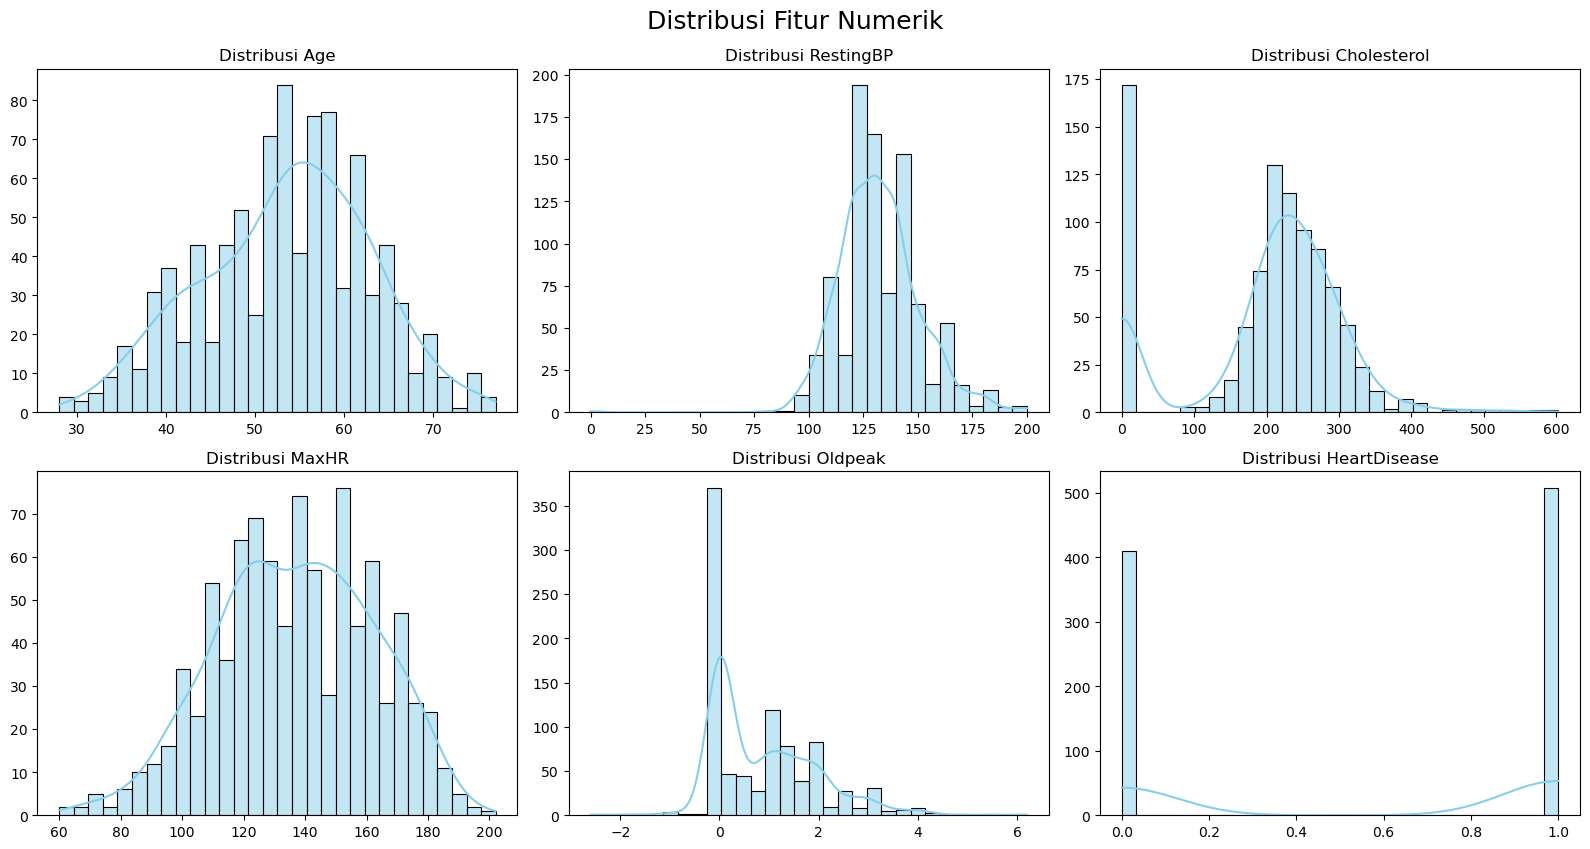

In [244]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',
       'HeartDisease']

plt.figure(figsize=(16, 12))  # Ukuran canvas

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # 3 baris x 3 kolom subplot
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle("Distribusi Fitur Numerik", fontsize=18, y=1.02)
plt.show()

### Visualisasi Distribusi Kelas Target

Visualisasi berikut digunakan untuk memahami **sebaran kelas target** `HeartDisease`, yang merupakan variabel yang diprediksi (0 = tidak ada penyakit jantung, 1 = ada penyakit jantung).
Visualisasi ini penting untuk memahami apakah data target **imbalanced**, yang dapat memengaruhi performa model klasifikasi.

### 🔢 Countplot
Menampilkan jumlah sampel untuk masing-masing kelas dalam bentuk batang.`

### 📊 Pie Chart

Menampilkan **proporsi kelas target** dalam bentuk persentase untuk melihat apakah data seimbang atau tidak.

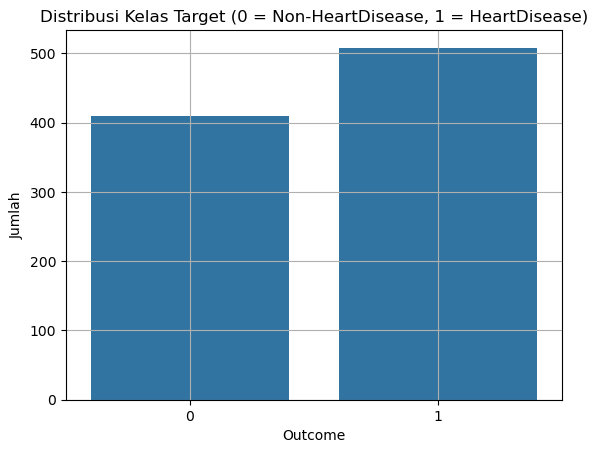

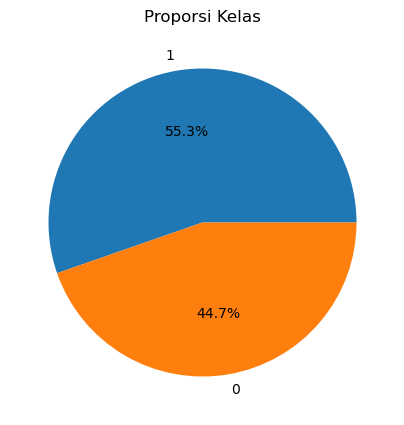

In [245]:
sns.countplot(x=target, data=data)
plt.title("Distribusi Kelas Target (0 = Non-HeartDisease, 1 = HeartDisease)")
plt.xlabel("Outcome")
plt.ylabel("Jumlah")
plt.grid(True)
plt.show()

# Proporsi
data[target].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title('Proporsi Kelas')
plt.ylabel('')
plt.show()


### Korelasi Antar Fitur Numerik

Visualisasi berikut menampilkan **heatmap korelasi** antar fitur numerik dalam dataset. Korelasi dihitung menggunakan koefisien Pearson, yang menunjukkan hubungan linier antar variabel.


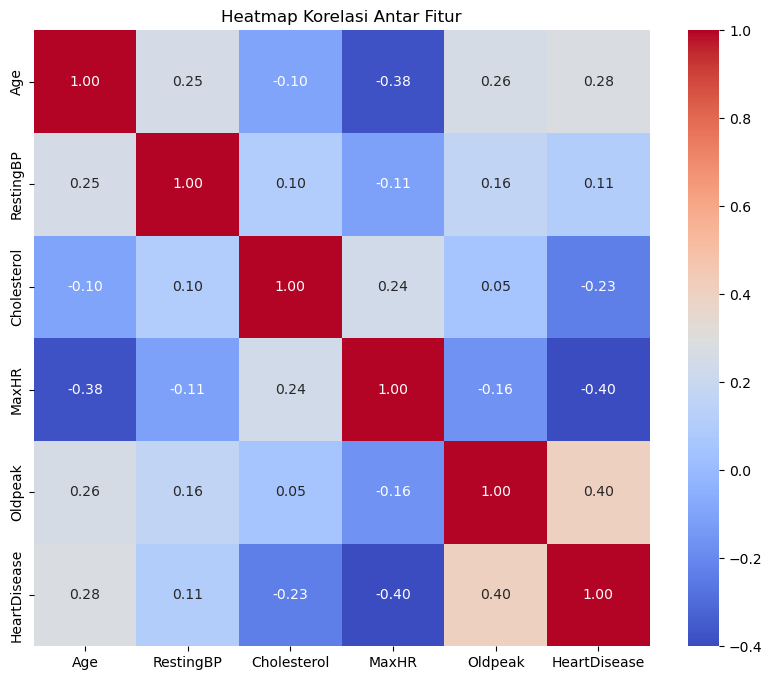

In [246]:
plt.figure(figsize=(10, 8))
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

### Anlisis Boxplot Fitur Numerik terhadap Kelas Target (Outcome)

Visualisasi berikut menampilkan **boxplot** untuk masing-masing fitur numerik terhadap kelas target `HeartDisease`. Boxplot digunakan untuk:

- Melihat **distribusi data** berdasarkan kelas (0 = non-penyakit, 1 = penyakit)
- Mengidentifikasi **perbedaan median dan sebaran** antar kelas
- Mendeteksi **outlier**


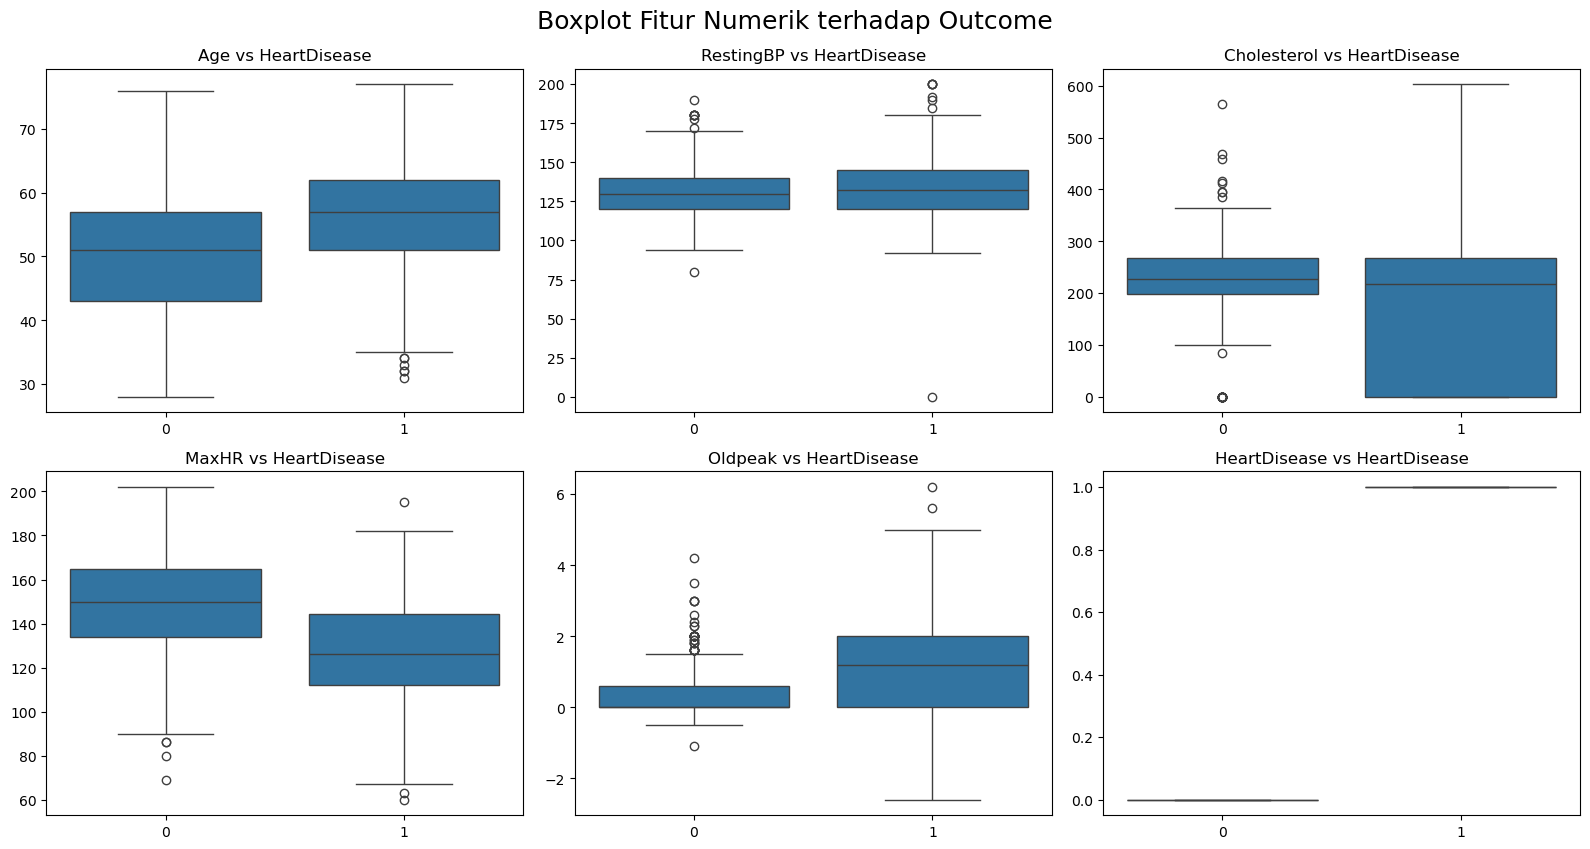

In [247]:
plt.figure(figsize=(16, 12))  # Ukuran canvas

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Grid subplot 3 baris x 3 kolom
    sns.boxplot(x=target, y=col, data=data)
    plt.title(f'{col} vs {target}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle("Boxplot Fitur Numerik terhadap Outcome", fontsize=18, y=1.02)
plt.show()

# 🧹 Preprocessing Data
### Daftar Nama Kolom

Tampilkan dulu **seluruh nama kolom (fitur)** yang terdapat dalam dataset.

In [248]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### Handling Missing Values

Handling missing values untuk memastikan data lengkap dan siap digunakan agar analisis dan pemodelan tidak terganggu oleh data kosong. Sehingga pada saat pemrosesan data tidak menyebabkan error dan hasil yang bias

In [249]:
len(data)

918

In [250]:
data.isna().sum() / len(data)

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

Pada dataset ini, hasil pengecekan menunjukkan **tidak ada missing values**, sehingga data sudah siap diproses lebih lanjut tanpa perlu penanganan khusus.

In [251]:
numerical_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

### Handling invalid values

Fungsi `preprocess_heart_disease(df)` bertujuan untuk membersihkan dataset dengan mengatasi nilai-nilai **invalid** yang dapat mengganggu analisis dan pemodelan, hasilnya data invalid dapat dikenali dan ditangani sehingga kualitas data meningkat sebelum analisis dan pemodelan.


In [252]:
def preprocess_heart_disease(df):
    # Age
    # Alasan: Usia < 18 biasanya bukan target penyakit jantung dewasa, bisa noise/outlier.
    initial_count = len(df)
    df = df[df['Age'] >= 18]
    print(f"Drop Age < 18: {initial_count - len(df)} rows removed.")

    # RestingBP
    # Alasan: Tekanan darah <= 0 gak mungkin secara medis, artinya data error.
    invalid_bp = df[df['RestingBP'] <= 0].shape[0]
    df.loc[df['RestingBP'] <= 0, 'RestingBP'] = np.nan  # ganti dengan NaN untuk imputasi nanti
    print(f"RestingBP <= 0: {invalid_bp} values set to NaN.")

    # Cholesterol
    # Alasan: Kolesterol 0 gak mungkin secara biologis, biasanya data hilang/keliru.
    invalid_chol = df[df['Cholesterol'] == 0].shape[0]
    df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = np.nan
    print(f"Cholesterol == 0: {invalid_chol} values set to NaN.")

    # FastingBS
    # Alasan: FastingBS harus binary 0 atau 1, nilai lain invalid.
    invalid_fbs = df[~df['FastingBS'].isin([0,1])].shape[0]
    df = df[df['FastingBS'].isin([0,1])]
    print(f"FastingBS invalid (not 0/1): {invalid_fbs} rows removed.")

    # MaxHR
    # Alasan: Biarkan dulu, tapi bisa dicek visual jika mau.
    # Opsional: cek outlier
    print(f"MaxHR range: min={df['MaxHR'].min()}, max={df['MaxHR'].max()}")

    # Oldpeak
    # Alasan: 0 valid, nilai tinggi bisa tetap valid, tidak dihapus.
    print(f"Oldpeak range: min={df['Oldpeak'].min()}, max={df['Oldpeak'].max()}")

    # HeartDisease (target)
    # Alasan: Target harus binary 0 atau 1, selain itu data tidak valid.
    invalid_target = df[~df['HeartDisease'].isin([0,1])].shape[0]
    df = df[df['HeartDisease'].isin([0,1])]
    print(f"HeartDisease invalid (not 0/1): {invalid_target} rows removed.")

    # # Optional: Imputasi missing values (RestingBP, Cholesterol)
    # # Bisa ganti NaN dengan median supaya data tetap lengkap
    # df['RestingBP'].fillna(df['RestingBP'].median(), inplace=True)
    # df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)
    # print("Imputasi missing RestingBP dan Cholesterol dengan median.")

    return df

In [253]:
data = preprocess_heart_disease(data)

Drop Age < 18: 0 rows removed.
RestingBP <= 0: 1 values set to NaN.
Cholesterol == 0: 172 values set to NaN.
FastingBS invalid (not 0/1): 0 rows removed.
MaxHR range: min=60, max=202
Oldpeak range: min=-2.6, max=6.2
HeartDisease invalid (not 0/1): 0 rows removed.


Analisis distribusi dilakukan menggunakan visualisasi histogram dan uji Shapiro-Wilk. Semua fitur yang invalid menunjukkan distribusi yang tidak normal, sehingga median dipilih sebagai metode imputasi yang lebih robust terhadap outlier.

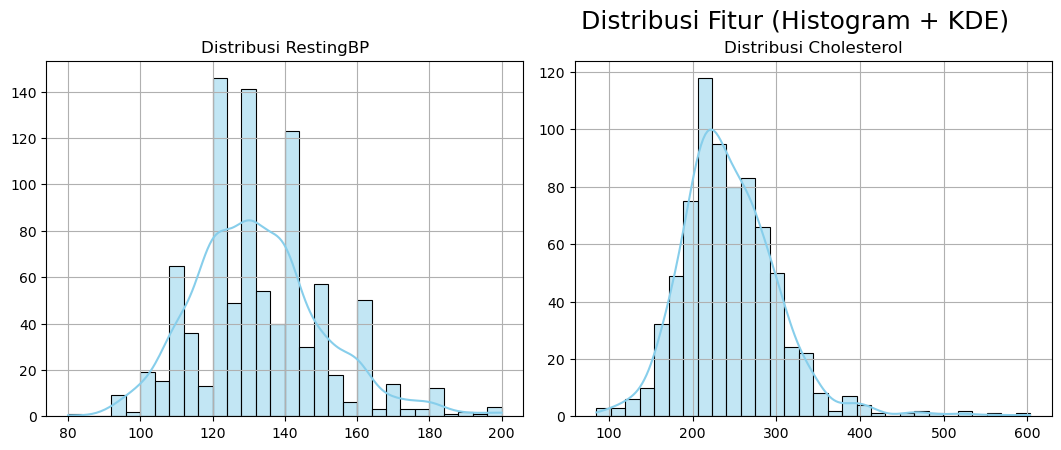

In [254]:
invalid_cols = ['RestingBP', 'Cholesterol']

# Subplot
plt.figure(figsize=(16, 8))
for i, col in enumerate(invalid_cols, 1):
    plt.subplot(2, 3, i)  # 2 baris x 3 kolom (1 slot kosong)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Distribusi Fitur (Histogram + KDE)", fontsize=18, y=1.02)
plt.show()

In [255]:
print("🔍 Hasil Uji Normalitas (Shapiro-Wilk):\n")
for col in invalid_cols:
    stat, p = shapiro(data[~data[col].isna()][col])
    print(f"{col}: p-value = {p:.4f} → ", end="")
    if p > 0.05:
        print("Distribusi kemungkinan **normal**")
    else:
        print("Distribusi kemungkinan **TIDAK normal**")

🔍 Hasil Uji Normalitas (Shapiro-Wilk):

RestingBP: p-value = 0.0000 → Distribusi kemungkinan **TIDAK normal**
Cholesterol: p-value = 0.0000 → Distribusi kemungkinan **TIDAK normal**


Beberapa fitur dalam dataset mengandung nilai 0 yang tidak valid secara medis, seperti `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, dan `BMI`. Nilai 0 pada kolom-kolom tersebut diganti dengan `NaN` dan kemudian diimputasi menggunakan nilai median dari masing-masing kolom.

Pendekatan ini dipilih karena median lebih tahan terhadap outlier dan cocok untuk distribusi yang tidak normal. Kolom seperti `Insulin` dan `SkinThickness` memiliki proporsi missing value yang tinggi, namun tetap dipertahankan dengan imputasi untuk menjaga kelengkapan fitur dalam sistem fuzzy.

In [256]:
cols_to_fix = invalid_cols.copy()

for col in cols_to_fix:
    median_val = data[~data[col].isna()][col].median()
    data[col].fillna(median_val, inplace=True)
    print(f"{col}: imputasi median = {median_val}")

RestingBP: imputasi median = 130.0
Cholesterol: imputasi median = 237.0


C:\Users\gtiri\AppData\Local\Temp\ipykernel_29284\3932647990.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_val, inplace=True)


## Handling Outliers

Karena dataset berisi data klinis yang rentan memiliki nilai ekstrim yang valid secara medis, kami memilih tidak melakukan penghapusan atau penanganan outlier secara khusus. Hal ini dikarenakan nilai-nilai ekstrim tersebut berpotensi mengandung informasi penting terkait diagnosis diabetes dan sistem fuzzy yang kami gunakan dapat menangani nilai-nilai tersebut melalui membership function yang fleksibel

## Split Data menjadi Training dan Testing Set

Kode berikut melakukan pemisahan dataset menjadi fitur (`X`) dan target (`y`), kemudian membagi data menjadi subset pelatihan dan pengujian:

Memisahkan data menjadi:  
  - **Training set** untuk melatih model  
  - **Testing set** untuk evaluasi model  

Parameter `stratify=y` memastikan distribusi kelas di training dan testing set tetap seimbang, menghindari bias kelas yang tidak proporsional.

Pembagian data ini penting agar model dapat belajar dari data training dan diuji pada data yang belum pernah dilihat untuk mengukur performa sebenarnya.


In [257]:
X = data.drop(columns=[target])[numerical_cols[:-1]]
y = data[target]

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=i, stratify=y)  # stratify biar distribusi kelas tetep balance
    
    is_valid = True
    for col in X_train.columns:
        train_min = X_train[col].min()
        train_max = X_train[col].max()
        
        if (X_test[col] < train_min).any() or (X_test[col] > train_max).any():
            # print(f"{col}: out-of-range value detected")
            is_valid = False
    
    if is_valid:
        print("All test values in train range:", is_valid, i)
        break

print("Habis")

All test values in train range: True 3
Habis


In [258]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3, stratify=y)  # stratify biar distribusi kelas tetep balance

## Normalisasi Data dengan Min-Max Scaler

Untuk memastikan fitur numerik berada dalam rentang yang sama dan memudahkan proses pembelajaran model, dilakukan normalisasi menggunakan **Min-Max Scaler**:

1. **Inisialisasi Scaler**  
   Membuat objek `MinMaxScaler()` yang akan mentransformasikan nilai fitur ke rentang [0, 1].

2. **Fitting dan Transformasi Data Training**  
   menghitung nilai minimum dan maksimum dari data training lalu mengubah data training ke skala [0, 1].

3. **Transformasi Data Testing**  
    mengubah data testing menggunakan skala yang sama dari data training tanpa menghitung ulang min/max agar konsisten.




Normalisasi ini penting untuk mencegah fitur dengan skala besar mendominasi model dan membantu algoritma konvergen lebih cepat dan stabil.


In [259]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [260]:
numerical_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

**Konversi Kembali ke DataFrame**  
   Hasil transformasi dikembalikan ke bentuk DataFrame dengan kolom dan indeks yang sama supaya mudah digunakan dan dianalisis.

In [261]:
# Balikin jadi dataframe lagi
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

**Cek Dimensi dan Distribusi**  
   Menampilkan ukuran data training dan testing serta distribusi kelas target pada masing-masing subset untuk memastikan data tetap seimbang setelah split.


In [262]:
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")

X_train shape: (734, 5)
X_test shape: (184, 5)


In [263]:
print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}\n")
print(f"y_test distribution:\n{y_test.value_counts(normalize=True)}")

y_train distribution:
HeartDisease
1    0.553134
0    0.446866
Name: proportion, dtype: float64

y_test distribution:
HeartDisease
1    0.554348
0    0.445652
Name: proportion, dtype: float64


**Contoh Sampel Data**  

In [264]:
X_train_scaled.sample(n=5, random_state=42)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
36,0.755102,0.500000,0.426641,0.190141,0.465909
253,0.693878,0.500000,0.359073,0.647887,0.409091
545,0.408163,0.433333,0.361004,0.556338,0.318182
134,0.673469,0.416667,0.403475,0.422535,0.409091
908,0.714286,0.500000,0.196911,0.591549,0.750000


# 🧠 Implementasi Model Fuzzy System

## 🔢 Definisi Input dan Output pada Sistem Fuzzy

### 📥 Input Variables (Fuzzy Input)

Kita **tidak menggunakan `ctrl.Antecedent`**, sehingga **tidak ada definisi formal** untuk variabel input.  
Sebagai gantinya, fungsi keanggotaan akan langsung dibuat untuk masing-masing input berikut:

1. **MaxHR** (Denyut jantung maksimum)  
2. **Oldpeak** (ST depression yang diukur saat istirahat)  
3. **Age** (Usia)  
4. **Cholesterol** (Tingkat kolesterol)

---

### 📤 Output Variable (Fuzzy Output)

Output juga **tidak menggunakan `ctrl.Consequent`**, sehingga nilai output akan didefinisikan secara manual.

- **Output:**
  - `0` = **Non-HeartDisease**
  - `1` = **HeartDisease**




## 📈 Membership Function (Fungsi Keanggotaan) dalam Fuzzy Logic

Fungsi keanggotaan digunakan untuk mengubah nilai input numerik menjadi nilai fuzzy dalam rentang \[0, 1].
Pada sistem ini, digunakan **fungsi segitiga (triangular membership function / `trimf`)** untuk menyatakan tiga kategori fuzzy utama:

* **Low** (young untuk Age)
* **Medium** (adult untuk Age)
* **High** (old untuk Age)

---

### 🛠️ Proses Pembuatan Fungsi Keanggotaan

1. **Ekstraksi Statistik**
   Untuk setiap kolom input (misalnya `MaxHR`, `Oldpeak`, `Age`, `Cholesterol`), dihitung lima nilai statistik dari data yang sudah dinormalisasi:

   * `min_val`: nilai minimum
   * `q1`: kuartil pertama (25%)
   * `med`: median (50%)
   * `q3`: kuartil ketiga (75%)
   * `max_val`: nilai maksimum

2. **Offset (Lebar Ambang Zona Overlap)**
   Offset dihitung sebagai:

$$
\text{offset} = 0.2 \times (q3 - q1)
$$

Offset ini digunakan untuk memberikan transisi halus antar fungsi keanggotaan (agar overlap terjadi antar kategori Low–Medium dan Medium–High). Nilai Offset 20% agar fungsi keanggotaan fuzzy memiliki sedikit overlap yang cukup, supaya batas antar kategori fuzzy tidak terlalu sempit atau terlalu lebar

3. **Fungsi Keanggotaan (Membership Functions)**
   Tiga fungsi segitiga dibuat untuk masing-masing kategori:

* **Low**:

$$
\text{trimf}(x, \text{min\_val}, \text{min\_val}, q1 + \text{offset})
$$

* **Medium**:

$$
\text{trimf}(x, q1 - \text{offset}, \text{median}, q3 + \text{offset})
$$

* **High**:

$$
\text{trimf}(x, q3 - \text{offset}, \text{max\_val}, \text{max\_val})
$$

4. **Visualisasi**
   Setiap fungsi keanggotaan divisualisasikan menggunakan `matplotlib` untuk melihat bentuk dan overlap antar kategori fuzzy.

---

### 📊 Contoh Visualisasi

Setelah fungsi keanggotaan dibuat untuk masing-masing input, dilakukan plotting untuk melihat bentuk fungsi fuzzy-nya.
Contohnya:

* Untuk `MaxHR`, fungsi keanggotaan akan membagi nilai detak jantung maksimal menjadi:

  * Rendah (Low)
  * Sedang (Medium)
  * Tinggi (High)

Hal ini berlaku pula untuk variabel lain (`Oldpeak`, `Age`, dan `Cholesterol`).

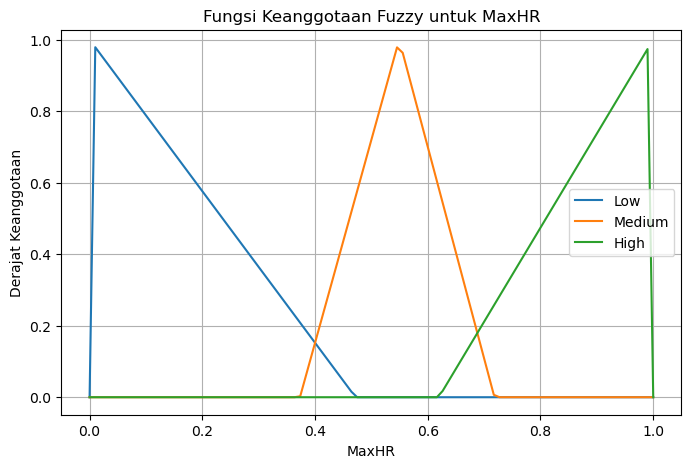

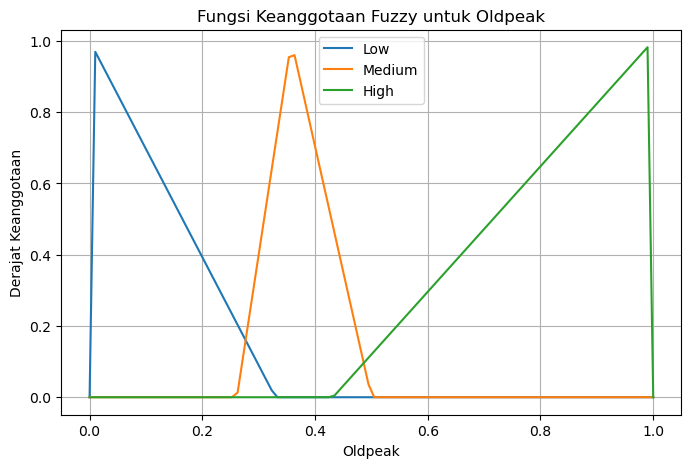

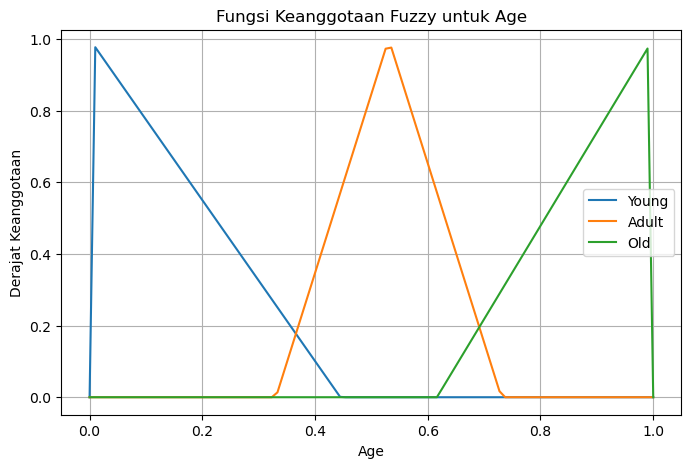

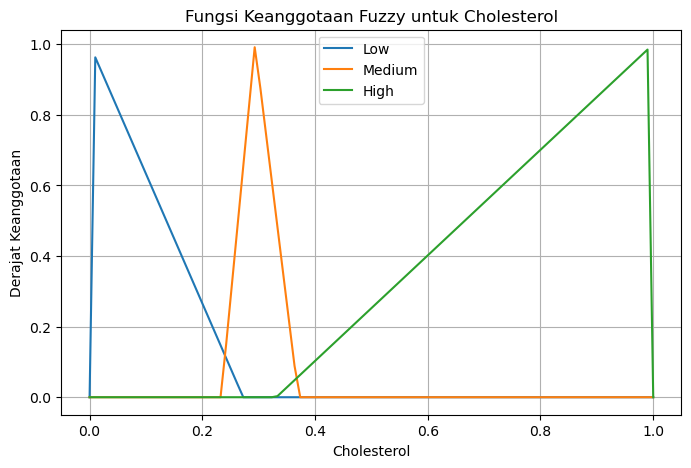

In [265]:
# Fungsi untuk mengambil nilai statistik penting dari kolom data yang sudah dinormalisasi
def get_fuzzy_ranges(col):
    q1 = X_train_scaled[col].quantile(0.25)  # Kuartil pertama (25%)
    median = X_train_scaled[col].median()    # Median (50%)
    q3 = X_train_scaled[col].quantile(0.75)  # Kuartil ketiga (75%)
    min_val = X_train_scaled[col].min()      # Nilai minimum data
    max_val = X_train_scaled[col].max()      # Nilai maksimum data
    return min_val, q1, median, q3, max_val  # Kembalikan semua nilai tersebut

# Fungsi untuk menghitung offset dari IQR sebagai lebar tambahan pada fungsi keanggotaan
def calculate_offset(q1, q3):
    return 0.2 * (q3 - q1)  # Offset = 20% dari rentang antar kuartil

# Fungsi segitiga (triangular membership function) untuk menghitung derajat keanggotaan fuzzy
def trimf(x, a, b, c):
    if x <= a or x >= c:
        return 0  # Di luar rentang segitiga → derajat keanggotaan 0
    elif a < x < b:
        return (x - a) / (b - a)  # Menaik dari a ke puncak b
    elif b < x < c:
        return (c - x) / (c - b)  # Turun dari puncak b ke c
    elif x == b:
        return 1  # Tepat di puncak b → derajat keanggotaan 1
    return 0  # Default fallback

# Fungsi untuk membuat tiga fungsi keanggotaan fuzzy (low, medium, high) dari data input
def create_membership_functions(col):
    min_val, q1, med, q3, max_val = get_fuzzy_ranges(col)
    offset = calculate_offset(q1, q3)

    # Definisikan fungsi keanggotaan fuzzy low, medium, dan high menggunakan segitiga
    def low(x): return trimf(x, min_val, min_val, q1 + offset)
    def medium(x): return trimf(x, q1 - offset, med, q3 + offset)
    def high(x): return trimf(x, q3 - offset, max_val, max_val)

    # Kembalikan ketiga fungsi beserta statistik dan offsetnya untuk visualisasi/analisis
    return low, medium, high, (min_val, q1, med, q3, max_val, offset)


# Membuat fungsi keanggotaan fuzzy untuk setiap variabel input menggunakan fungsi di atas
maxhr_low, maxhr_med, maxhr_high, maxhr_stats = create_membership_functions('MaxHR')
oldpeak_low, oldpeak_med, oldpeak_high, oldpeak_stats = create_membership_functions('Oldpeak')
age_low, age_med, age_high, age_stats = create_membership_functions('Age')
chol_low, chol_med, chol_high, chol_stats = create_membership_functions('Cholesterol')

# Fungsi untuk memplot grafik fungsi keanggotaan fuzzy secara manual dan visual
def plot_manual_fuzzy(col_name, stats):
    # Ambil nilai statistik dan offset dari tuple
    min_val, q1, med, q3, max_val, offset = stats
    x = np.linspace(min_val, max_val, 100)  # Buat rentang nilai x untuk plotting

    # Hitung derajat keanggotaan untuk setiap fungsi fuzzy di rentang x
    low_vals = [trimf(i, min_val, min_val, q1 + offset) for i in x]
    med_vals = [trimf(i, q1 - offset, med, q3 + offset) for i in x]
    high_vals = [trimf(i, q3 - offset, max_val, max_val) for i in x]

    plt.figure(figsize=(8, 5))  # Atur ukuran figure

    # Label sumbu dan legend berbeda untuk variabel Age vs lainnya
    if col_name == 'Age':
        plt.plot(x, low_vals, label='Young')    
        plt.plot(x, med_vals, label='Adult')    
        plt.plot(x, high_vals, label='Old')     
    else:
        plt.plot(x, low_vals, label='Low')     
        plt.plot(x, med_vals, label='Medium')   
        plt.plot(x, high_vals, label='High')   

    plt.title(f'Fungsi Keanggotaan Fuzzy untuk {col_name}')  
    plt.xlabel(col_name)         
    plt.ylabel('Derajat Keanggotaan')  
    plt.legend()                 
    plt.grid(True)             
    plt.show()                   


# Memanggil fungsi plotting untuk semua variabel input
plot_manual_fuzzy('MaxHR', maxhr_stats)
plot_manual_fuzzy('Oldpeak', oldpeak_stats)
plot_manual_fuzzy('Age', age_stats)
plot_manual_fuzzy('Cholesterol', chol_stats)



## 🧠 Fuzzy Rules (Aturan Fuzzy)

Fuzzy rules merupakan inti dari sistem inferensi fuzzy. Aturan-aturan ini menjelaskan hubungan antara **kondisi input** (dalam bentuk fuzzy) dan **kesimpulan output**.

### 📌 Format Umum Fuzzy Rule

```

IF (MaxHR, Oldpeak, Age, Cholesterol) THEN HeartDisease

````

Setiap rule disusun dalam format:

```python
{'if': (<MaxHR>, <Oldpeak>, <Age>, <Cholesterol>), 'then': <label>}
````

Nilai `if` adalah kategori fuzzy dari masing-masing variabel input:

* `MaxHR`: low, med, high
* `Oldpeak`: low, med, high
* `Age`: young, adult, old
* `Cholesterol`: low, med, high

Nilai `then` adalah hasil diagnosis fuzzy:

* `"heart disease"`: kemungkinan menderita penyakit jantung
* `"no heart disease"`: kemungkinan tidak menderita penyakit jantung

---

### 📋 Contoh Aturan

```python
{'if': ('low', 'high', 'old', 'high'), 'then': 'heart disease'}
```

> Jika MaxHR **rendah**, Oldpeak **tinggi**, usia **tua**, dan kolesterol **tinggi** → maka hasilnya **heart disease**

```python
{'if': ('high', 'low', 'young', 'low'), 'then': 'no heart disease'}
```

> Jika MaxHR **tinggi**, Oldpeak **rendah**, usia **muda**, dan kolesterol **rendah** → maka hasilnya **no heart disease**

---

### 🧮 Cara Kerja Fuzzy Rule

1. Nilai input numerik dikonversi menjadi fuzzy (misalnya `med`, `high`, dst.).
2. Sistem mencocokkan kombinasi fuzzy tersebut dengan aturan yang tersedia.
3. Rule yang sesuai menghasilkan output berupa prediksi kondisi pasien.
4. Agregasi atau voting antar rule dapat digunakan untuk keputusan akhir.

---

### 🤖 Mengapa Banyak Aturan?

* Karena sistem fuzzy tidak menggunakan rumus statistik eksplisit.
* Sistem ini mengandalkan aturan berbasis logika linguistik dan pengetahuan pakar.
* Semakin banyak aturan yant tepa, semakin baik dan akurat sistem memahami berbagai kondisi data.

---

### ✅ Kelebihan Fuzzy Rule-Based System

* Mudah dipahami oleh manusia (mirip logika alami).
* Dapat dikembangkan atau dikustomisasi sesuai kebutuhan.
* Sangat cocok untuk aplikasi seperti sistem pendukung keputusan di bidang medis.


In [266]:
fuzzy_rules = [
    {'if': ('low', 'high', 'old', 'high'), 'then': 'heart disease'},
    {'if': ('low', 'high', 'old', 'med'), 'then': 'heart disease'},
    {'if': ('low', 'med', 'old', 'high'), 'then': 'heart disease'},
    {'if': ('low', 'high', 'adult', 'high'), 'then': 'heart disease'},
    {'if': ('med', 'high', 'old', 'high'), 'then': 'heart disease'},
    {'if': ('low', 'high', 'adult', 'med'), 'then': 'heart disease'},
    {'if': ('low', 'med', 'adult', 'high'), 'then': 'heart disease'},
    {'if': ('med', 'high', 'old', 'med'), 'then': 'heart disease'},
    {'if': ('low', 'low', 'old', 'high'), 'then': 'heart disease'},
    {'if': ('med', 'med', 'old', 'high'), 'then': 'heart disease'},
    {'if': ('low', 'high', 'young', 'high'), 'then': 'heart disease'},
    {'if': ('med', 'high', 'adult', 'high'), 'then': 'heart disease'},
    {'if': ('low', 'med', 'old', 'med'), 'then': 'heart disease'},
    {'if': ('med', 'low', 'old', 'high'), 'then': 'heart disease'},
    {'if': ('low', 'med', 'adult', 'med'), 'then': 'heart disease'},
    {'if': ('med', 'med', 'old', 'med'), 'then': 'heart disease'},
    {'if': ('high', 'high', 'old', 'high'), 'then': 'heart disease'},
    {'if': ('med', 'high', 'young', 'med'), 'then': 'heart disease'},
    {'if': ('low', 'high', 'young', 'med'), 'then': 'heart disease'},
    {'if': ('med', 'med', 'adult', 'med'), 'then': 'heart disease'},
    {'if': ('high', 'med', 'old', 'high'), 'then': 'heart disease'},
    {'if': ('low', 'low', 'old', 'med'), 'then': 'heart disease'},
    {'if': ('med', 'low', 'adult', 'high'), 'then': 'heart disease'},
    {'if': ('high', 'high', 'adult', 'med'), 'then': 'heart disease'},
    {'if': ('med', 'med', 'young', 'high'), 'then': 'no heart disease'},
    {'if': ('high', 'low', 'old', 'high'), 'then': 'no heart disease'},
    {'if': ('med', 'med', 'young', 'med'), 'then': 'no heart disease'},
    {'if': ('high', 'med', 'adult', 'high'), 'then': 'no heart disease'},
    {'if': ('low', 'med', 'young', 'high'), 'then': 'no heart disease'},
    {'if': ('high', 'high', 'young', 'high'), 'then': 'no heart disease'},
    {'if': ('med', 'high', 'young', 'low'), 'then': 'no heart disease'},
    {'if': ('high', 'low', 'old', 'med'), 'then': 'no heart disease'},
    {'if': ('low', 'low', 'adult', 'high'), 'then': 'no heart disease'},
    {'if': ('high', 'med', 'young', 'med'), 'then': 'no heart disease'},
    {'if': ('med', 'low', 'young', 'med'), 'then': 'no heart disease'},
    {'if': ('high', 'low', 'adult', 'med'), 'then': 'no heart disease'},
    {'if': ('med', 'med', 'young', 'low'), 'then': 'no heart disease'},
    {'if': ('high', 'high', 'young', 'med'), 'then': 'no heart disease'},
    {'if': ('low', 'med', 'young', 'med'), 'then': 'no heart disease'},
    {'if': ('high', 'low', 'young', 'high'), 'then': 'no heart disease'},
    {'if': ('med', 'low', 'adult', 'med'), 'then': 'no heart disease'},
    {'if': ('high', 'med', 'adult', 'low'), 'then': 'no heart disease'},
    {'if': ('high', 'low', 'young', 'low'), 'then': 'no heart disease'},
    {'if': ('high', 'low', 'young', 'med'), 'then': 'no heart disease'},
    {'if': ('med', 'low', 'young', 'low'), 'then': 'no heart disease'},
    {'if': ('high', 'med', 'young', 'low'), 'then': 'no heart disease'},
    {'if': ('high', 'low', 'adult', 'low'), 'then': 'no heart disease'},
    {'if': ('med', 'low', 'adult', 'low'), 'then': 'no heart disease'},
    {'if': ('high', 'low', 'old', 'low'), 'then': 'no heart disease'},
    {'if': ('low', 'low', 'young', 'low'), 'then': 'no heart disease'},
    {'if': ('low', 'low', 'young', 'med'), 'then': 'no heart disease'},
    {'if': ('low', 'low', 'adult', 'low'), 'then': 'no heart disease'},
    {'if': ('low', 'low', 'adult', 'med'), 'then': 'no heart disease'},
    {'if': ('low', 'med', 'young', 'low'), 'then': 'no heart disease'},
    {'if': ('med', 'med', 'adult', 'high'), 'then': 'heart disease'},
    {'if': ('high', 'high', 'old', 'med'), 'then': 'heart disease'},
    {'if': ('high', 'med', 'old', 'med'), 'then': 'heart disease'},
    {'if': ('high', 'high', 'adult', 'high'), 'then': 'heart disease'}
]


## 🧠 Inferensi Fuzzy dengan Metode Mamdani dan Evaluasi Prediksi

### 🔄 1. Fungsi Inferensi Fuzzy 

```python
fuzzy_inference(maxhr_val, oldpeak_val, age_val, chol_val)
````

#### Proses Utama:

1. **Fuzzifikasi**
   Nilai numerik input (`MaxHR`, `Oldpeak`, `Age`, `Cholesterol`) diubah menjadi derajat keanggotaan fuzzy dalam kategori:

   * `low`, `med`, `high` (atau `young`, `adult`, `old` untuk `Age`).

2. **Evaluasi Aturan Fuzzy**
   Setiap aturan fuzzy dalam `fuzzy_rules` dievaluasi menggunakan nilai minimum dari derajat keanggotaan input terkait.

3. **Agregasi Output**
   Aktivasi dari semua aturan dikumpulkan, kemudian hasil output dari aturan (`heart disease` = 1, `no heart disease` = 0) diberikan bobot sesuai tingkat aktivasi.

4. **Defuzzifikasi (Centroid)**
   Hasil akhir dihitung dengan metode **centroid** sebagai rata-rata berbobot dari nilai output, yaitu:

   $$
   \text{output} = \frac{\sum (\text{aktivasi} \times \text{nilai output})}{\sum \text{aktivasi}}
   $$

   Jika tidak ada aturan yang aktif (semua aktivasi = 0), hasil default adalah 0.
   Metode centroid dipilih karena lebih representatif karena mempertimbangkan seluruh bentuk fungsi keanggotaan dari output fuzzy, tidak seperti Mean of Maximum yang hanya mempertimbangkan titik maksimum saja.

---

### 🤖 2. Prediksi Batch dengan Threshold

```python
fuzzy_predict_manual(X_scaled, threshold=0.5)
```

* Fungsi ini menjalankan inferensi fuzzy Mamdani pada setiap sampel data uji.
* Hasil inferensi berupa skor kontinu.
* Skor ini kemudian dikonversi menjadi kelas biner menggunakan threshold (default 0.35):

  * Skor ≥ threshold → kelas **1** (penyakit jantung)
  * Skor < threshold → kelas **0** (tidak ada penyakit)
---
```

In [267]:
def fuzzy_inference_mamdani(maxhr_val, oldpeak_val, age_val, chol_val):
    # Fuzzifikasi nilai input
    # Menghitung derajat keanggotaan masing-masing variabel input terhadap kategori fuzzy-nya
    maxhr_membership = {
        'low': maxhr_low(maxhr_val),
        'med': maxhr_med(maxhr_val),
        'high': maxhr_high(maxhr_val)
    }
    oldpeak_membership = {
        'low': oldpeak_low(oldpeak_val),
        'med': oldpeak_med(oldpeak_val),
        'high': oldpeak_high(oldpeak_val)
    }
    age_membership = {
        'young': age_low(age_val),
        'adult': age_med(age_val),
        'old': age_high(age_val)
    }
    chol_membership = {
        'low': chol_low(chol_val),
        'med': chol_med(chol_val),
        'high': chol_high(chol_val)
    }

    # Mapping output ke nilai numerik
    # Digunakan dalam proses defuzzifikasi nanti
    output_map = {
        'heart disease': 1,
        'no heart disease': 0
    }

    results = []  # Menyimpan (activation, output) dari tiap rule

    # Evaluasi semua rule fuzzy
    for rule in fuzzy_rules:
        # Ambil istilah fuzzy dari rule
        maxhr_term, oldpeak_term, age_term, chol_term = rule['if']

        # Hitung nilai aktivasi rule berdasarkan nilai minimum dari semua input
        activation = min(
            maxhr_membership[maxhr_term],
            oldpeak_membership[oldpeak_term],
            age_membership[age_term],
            chol_membership[chol_term]
        )

        # Simpan nilai aktivasi dan output numerik dari rule
        results.append((activation, output_map[rule['then']]))

    # Langkah 4: Defuzzifikasi menggunakan metode centroid
    # Jika semua rule tidak aktif, kembalikan nilai 0 sebagai fallback
    if sum(w for w, v in results) == 0:
        return 0

    # Hitung rata-rata tertimbang dari seluruh output berdasarkan tingkat aktivasi (centroid)
    output = sum(w * v for w, v in results) / sum(w for w, v in results)

    # Kembalikan nilai defuzzifikasi sebagai skor akhir fuzzy
    return output


In [ ]:
def fuzzy_predict_mamdani(X_scaled, threshold=0.5):
    preds = [] # Menyimpan hasil prediksi target
    for _, row in X_scaled.iterrows():
        # Jalankan fuzzy inference untuk tiap baris data uji
        score = fuzzy_inference_mamdani(
            row['MaxHR'], row['Oldpeak'], row['Age'], row['Cholesterol']
        )
        # Konversi skor fuzzy ke kelas (0 atau 1) berdasarkan threshold
        preds.append(1 if score >= threshold else 0)
    return preds

# Jalankan prediksi batch menggunakan metode Mamdani
y_pred_manual_mamdani = fuzzy_predict_mamdani(X_test_scaled, threshold=0.5)

# Tampilkan hasil prediksi
print("\nHasil Prediksi (Mamdani Fuzzy):")
for i in range(10):
    print(f"Data {i+1}: Prediksi = {'Heart Disease' if y_pred_manual_mamdani[i] == 1 else 'No Heart Disease'}")

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_manual_mamdani)
print(f"\nAccuracy Mamdani fuzzy: {accuracy:.3f}")

# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_manual_mamdani, target_names=['Non-Disease','Disease']))


Hasil Prediksi (Mamdani Fuzzy):
Data 1: Prediksi = Heart Disease
Data 2: Prediksi = Heart Disease
Data 3: Prediksi = No Heart Disease
Data 4: Prediksi = No Heart Disease
Data 5: Prediksi = No Heart Disease
Data 6: Prediksi = Heart Disease
Data 7: Prediksi = Heart Disease
Data 8: Prediksi = No Heart Disease
Data 9: Prediksi = Heart Disease
Data 10: Prediksi = No Heart Disease

Accuracy Mamdani fuzzy: 0.685

Classification Report:
              precision    recall  f1-score   support

 Non-Disease       0.64      0.68      0.66        82
     Disease       0.73      0.69      0.71       102

    accuracy                           0.68       184
   macro avg       0.68      0.68      0.68       184
weighted avg       0.69      0.68      0.69       184



## 🔍 Inferensi Fuzzy dengan Metode Sugeno dan Evaluasi Prediksi

### 🔄 1. Fungsi Inferensi Fuzzy (Sugeno)

```python
fuzzy_inference_sugeno(maxhr_val, oldpeak_val, age_val, chol_val)
```

#### Proses Utama:

1. **Fuzzifikasi**
   Nilai numerik input (`MaxHR`, `Oldpeak`, `Age`, `Cholesterol`) diubah menjadi derajat keanggotaan fuzzy dalam kategori:

   * `low`, `med`, `high` (atau `young`, `adult`, `old` untuk `Age`).

2. **Evaluasi Aturan Fuzzy**
   Setiap aturan fuzzy dalam `fuzzy_rules` dievaluasi menggunakan operator **MIN** (AND Sugeno) untuk menentukan tingkat aktivasi rule.

3. **Output Sugeno (Fungsi linear)**
   * Jika output aturan adalah `'heart disease'`, output aturan dihitung sebagai fungsi linear dari input dengan bobot korelasi fitur terhadap diagnosis penyakit jantung:

     **Bobot didasarkan pada nilai korelasi absolut masing-masing fitur terhadap diagnosis penyakit jantung**
     Lakukan normalisasi berdasarkan total bobot. Misalkan nilai korelasi absolut sebagai berikut:

     | Fitur       | Korelasi | Nilai Absolut | Normalisasi (≈)     |
     | ----------- | -------- | ------------- | ------------------- |
     | MaxHR       | -0.4     | 0.4           | 0.4 / 1.31 ≈ 0.305  |
     | OldPeak     | 0.4      | 0.4           | 0.4 / 1.31 ≈ 0.305  |
     | Age         | 0.28     | 0.28          | 0.28 / 1.31 ≈ 0.214 |
     | Cholesterol | -0.23    | 0.23          | 0.23 / 1.31 ≈ 0.176 |

     Total bobot = 0.4 + 0.4 + 0.28 + 0.23 = 1.31

     Sehingga rumus output aturan `'heart disease'` adalah:

     $$
     \text{output} = 0.305 \times MaxHR + 0.305 \times Oldpeak + 0.214 \times Age + 0.176 \times Cholesterol
     $$

   * Jika output aturan adalah `'no heart disease'`, outputnya adalah 0.

4. **Agregasi (Weighted Average)**
   Hasil akhir dihitung sebagai rata-rata berbobot (weighted average) dari nilai output aturan, dengan bobot berupa tingkat aktivasi:

   $$
   \text{output} = \frac{\sum (\text{aktivasi} \times \text{output konstanta})}{\sum \text{aktivasi}}
   $$

   Jika semua aturan memiliki aktivasi nol (tidak aktif), nilai default adalah 0.

---

### 🤖 2. Prediksi Batch dengan Threshold

```python
fuzzy_predict_manual(X_scaled, threshold=0.2)
```

* Fungsi ini menjalankan inferensi fuzzy Sugeno untuk setiap baris data dalam dataset `X_scaled`.
* Hasil inferensi berupa nilai kontinu antara 0–1.
* Skor ini kemudian dikonversi menjadi kelas biner menggunakan threshold (default 0.2):

  * Skor ≥ threshold → kelas **1** (penyakit jantung)
  * Skor < threshold → kelas **0** (tidak ada penyakit)

---

In [269]:
def fuzzy_inference_sugeno(maxhr_val, oldpeak_val, age_val, chol_val):
    # Fuzzifikasi nilai input
    # Menghitung derajat keanggotaan masing-masing variabel input terhadap kategori fuzzy-nya
    maxhr_membership = {
        'low': maxhr_low(maxhr_val), 
        'med': maxhr_med(maxhr_val), 
        'high': maxhr_high(maxhr_val)
    }
    oldpeak_membership = {
        'low': oldpeak_low(oldpeak_val), 
        'med': oldpeak_med(oldpeak_val), 
        'high': oldpeak_high(oldpeak_val)
    }
    age_membership = {
        'young': age_low(age_val), 
        'adult': age_med(age_val), 
        'old': age_high(age_val)
    }
    chol_membership = {
        'low': chol_low(chol_val), 
        'med': chol_med(chol_val), 
        'high': chol_high(chol_val)
    }

    # Inisialisasi akumulator weighted sum dan total bobot (aktivasi)
    weighted_sum = 0
    sum_weights = 0

    # Evaluasi semua rule fuzzy
    for rule in fuzzy_rules:
        # Ambil istilah fuzzy dari rule
        maxhr_term, oldpeak_term, age_term, chol_term = rule['if']
        # Hitung nilai aktivasi rule berdasarkan nilai minimum dari semua input
        activation = min(
            maxhr_membership[maxhr_term],
            oldpeak_membership[oldpeak_term],
            age_membership[age_term],
            chol_membership[chol_term]
        )

        # Output Sugeno berupa fungsi linear dan tergantung pada kondisi 'then'
        if rule['then'] == 'heart disease':
            # Bobot didasarkan pada nilai korelasi absolut masing-masing fitur terhadap diagnosis penyakit jantung
            # Lakukan normalisasi berdasarkan total bobot
            # Misalkan kita punya nilai korelasi absolut sebagai berikut:
            # total = |−0.4| + |0.4| + |0.28| + |−0.23| = 0.4 + 0.4 + 0.28 + 0.23 = 1.31
            # Corr MaxHR = -0.4  → nilai absolut 0.4, nilai normalisasi sekitar 0.4 / 1.31 ≈ 0.305
            # Corr OldPeak = 0.4 → nilai normalisasi sekitar 0.4 / 1.31 ≈ 0.305
            # Corr Age = 0.28 → nilai normalisasi sekitar 0.28 / 1.31 ≈ 0.214
            # Corr Cholesterol = -0.23 → nilai absolut 0.23, nilai normalisasi sekitar 0.23 / 1.31 ≈ 0.176
            output_val = (
                0.305 * maxhr_val +
                0.305 * oldpeak_val +
                0.214 * age_val +
                0.176 * chol_val
            )

        else:
            output_val = 0 # karena 'no heart disease' maka outputnya 0

        # Tambahkan weighted output ke total weighted sum
        weighted_sum += activation * output_val
        # Tambahkan aktivasi ke total bobot
        sum_weights += activation

    # Jika total bobot 0, return nilai default 0
    if sum_weights == 0:
        return 0  # fallback jika semua activation 0

    # Hitung nilai defuzzifikasi sebagai rata-rata berbobot
    return weighted_sum / sum_weights


In [271]:
def fuzzy_predict_sugeno(X_scaled, threshold=0.2):
    preds = [] # Menyimpan hasil prediksi target
    for _, row in X_scaled.iterrows():
         # Jalankan fuzzy inference untuk tiap baris data uji
        score = fuzzy_inference_sugeno(
            row['MaxHR'], row['Oldpeak'], row['Age'], row['Cholesterol']
        )
        # Konversi skor fuzzy ke kelas (0 atau 1) berdasarkan threshold
        preds.append(1 if score >= threshold else 0)
    return preds


# 1) Jalankan prediksi manual
y_pred_manual_sugeno = fuzzy_predict_sugeno(X_test_scaled, threshold=0.2)
# Tampilkan hasil prediksi
print("\nHasil Prediksi (Sugeno Fuzzy):")
for i in range(10):
    print(f"Data {i+1}: Prediksi = {'Heart Disease' if y_pred_manual_sugeno[i] == 1 else 'No Heart Disease'}")

# 2) Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_manual_sugeno)
print(f"\nAccuracy Sugeno fuzzy: {accuracy:.3f}")

# 3) Tampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_manual_sugeno, target_names=['Non-Disease','Disease']))



Hasil Prediksi (Sugeno Fuzzy):
Data 1: Prediksi = Heart Disease
Data 2: Prediksi = Heart Disease
Data 3: Prediksi = No Heart Disease
Data 4: Prediksi = No Heart Disease
Data 5: Prediksi = No Heart Disease
Data 6: Prediksi = Heart Disease
Data 7: Prediksi = Heart Disease
Data 8: Prediksi = No Heart Disease
Data 9: Prediksi = Heart Disease
Data 10: Prediksi = No Heart Disease

Accuracy Sugeno fuzzy: 0.679

Classification Report:
              precision    recall  f1-score   support

 Non-Disease       0.63      0.68      0.65        82
     Disease       0.73      0.68      0.70       102

    accuracy                           0.68       184
   macro avg       0.68      0.68      0.68       184
weighted avg       0.68      0.68      0.68       184



# 📈 Evaluasi Model

## Evaluasi dengan Metrik

(accuracy, presisi, recall, F1-score, confusion matrix)

Model dievaluasi menggunakan dua pendekatan fuzzy: **Mamdani** dan **Sugeno**, dengan metrik evaluasi sebagai berikut:

- **Akurasi (Accuracy)**: Mengukur seberapa banyak prediksi yang benar dari seluruh data uji.
- **Precision**: Mengukur ketepatan model dalam memprediksi kelas positif (Heart Disease).
- **Recall (Sensitivity)**: Mengukur kemampuan model dalam menangkap semua kasus positif yang sebenarnya.
- **F1-score**: Rata-rata harmonis dari precision dan recall, berguna terutama saat data tidak seimbang.

Metrik-metrik ini dihitung menggunakan fungsi `accuracy_score` dan `classification_report` dari pustaka *scikit-learn*.


# Analisis hasil

### a. Metode Mamdani

- **Input variabel**: MaxHR, Oldpeak, Age, Cholesterol  
- **Output** diproses menggunakan sistem fuzzy Mamdani  
- **Threshold** digunakan untuk menentukan kelas akhir  

**Hasil evaluasi:**

- **Accuracy (manual fuzzy)**: 0.685

**Classification Report:**
| Class        | Precision | Recall | F1-Score | Support |
|--------------|-----------|--------|----------|---------|
| Non-Disease  | 0.64      | 0.68   | 0.66     | 82      |
| Disease      | 0.73      | 0.69   | 0.71     | 102     |
|              |           |        |          |         |
| **Accuracy** |           |        | 0.68     | 184     |
| **Macro Avg**| 0.68      | 0.68   | 0.68     | 184     |
| **Weighted Avg** | 0.69  | 0.68   | 0.69     | 184     |



---

### b. Metode Sugeno

- **Menggunakan bobot fitur**: MaxHR, Oldpeak, Age, Cholesterol  
- **Output** berupa rata-rata tertimbang, kemudian dibandingkan dengan threshold untuk klasifikasi  

**Hasil evaluasi:**

- **Accuracy (manual fuzzy)**: 0.679

**Classification Report:**

| Class         | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| Non-Disease   | 0.63      | 0.68   | 0.65     | 82      |
| Disease       | 0.73      | 0.68   | 0.70     | 102     |
|               |           |        |          |         |
| **Accuracy**  |           |        | 0.68     | 184     |
| **Macro Avg** | 0.68      | 0.68   | 0.68     | 184     |
| **Weighted Avg** | 0.68   | 0.68   | 0.68     | 184     |



# 📝 Kesimpulan dan Analisis

Buatin kesimpulkan apa yang dipelajari, mana metode yang lebih baik, dan kenapanya

## Kesimpulan

- Akurasi yang diperoleh dari pendekatan **Sugeno** lebih kecil (0.679) dari hasil dari **Mamdani** yaitu 0.685.
- Pendekatan Mamdani menghasilkan nilai precision, recall, dan f1-score yang lebih akurat dibandingkan pendekatan sugeno, menunjukkan bahwa perhitungan fuzzy menghasilkan performa yang lebih baik menggunakan perhitungan Mamdani yang tanpa menggunakan bobot.
- Secara umum, performa model tergolong **cukup baik untuk diagnosis awal** penyakit jantung.
- Namun, nilai **recall pada kelas positif (Disease)** masih dapat ditingkatkan agar sistem lebih sensitif dalam mendeteksi kasus penyakit jantung.

## Analisis Tambahan

- **Threshold Sensitivity**:  
  Performa model cukup sensitif terhadap perubahan nilai threshold. Oleh karena itu, pencarian threshold optimal sangat penting agar tercapai keseimbangan antara nilai precision dan recall.

- **Feature Importance**:  
  Fitur **Kolesterol** dan **Age** terlihat memiliki pengaruh dominan terhadap hasil prediksi, terutama terlihat dari bobot pada pendekatan Sugeno.

- **Pengembangan Lebih Lanjut**:  
  Pengujian dapat diperluas dengan:
  - Mengembangkan aturan fuzzy (*fuzzy rules*) yang lebih kompleks dan mencerminkan kondisi klinis yang lebih detail.
  - Menggabungkan pendekatan fuzzy dengan algoritma *machine learning* seperti **Random Forest** atau **Support Vector Machine (SVM)** untuk meningkatkan akurasi dan generalisasi model.
